### Indian Institute of Information Technology Raichur

**Name:** K. V. Jaya Harsha  
**Roll No:** CS23B1034  
**Course:** Deep Learning for Medical Imaging  

---

#### Project 1: Brain MRI Tumor Segmentation  
##### A Comparative Study of Otsu and Sauvola Thresholding

**Dataset:** Kaggle Brain MRI Tumor Dataset  
**Objective:** Tumor region segmentation from MRI slices  
**Evaluation Metrics:** Dice Score, Jaccard Index  


In [1]:
!pip install kagglehub opencv-python scikit-image matplotlib numpy scikit-learn

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu, threshold_sauvola
from sklearn.metrics import jaccard_score
import kagglehub

In [3]:
# Download dataset
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'brain-tumor-mri-dataset' dataset.
Path to dataset files: /kaggle/input/brain-tumor-mri-dataset


In [4]:
TRAIN_PATH = os.path.join(path, "Training")

print("Training path:", TRAIN_PATH)
print("Folders:", os.listdir(TRAIN_PATH))

Training path: /kaggle/input/brain-tumor-mri-dataset/Training
Folders: ['pituitary', 'notumor', 'meningioma', 'glioma']


In [5]:
images = []
labels = []

for folder in os.listdir(TRAIN_PATH):
    folder_path = os.path.join(TRAIN_PATH, folder)
    
    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        if img is not None:
            images.append(img)
            labels.append(folder)

print("Total images loaded:", len(images))


Total images loaded: 5712


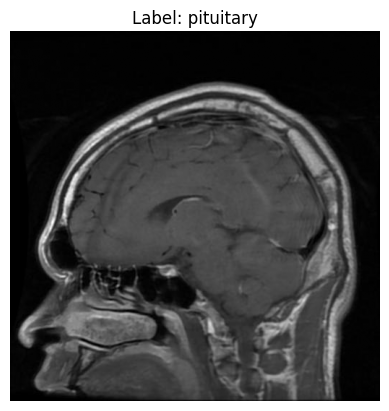

In [6]:
plt.imshow(images[0], cmap='gray')
plt.title(f"Label: {labels[0]}")
plt.axis("off")
plt.show()

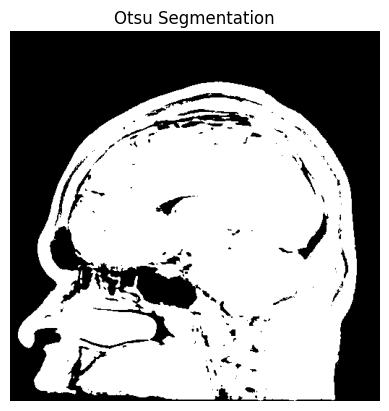

In [7]:
def apply_otsu(image):
    thresh = threshold_otsu(image)
    binary = image > thresh
    return binary.astype(np.uint8)

otsu_result = apply_otsu(images[0])

plt.imshow(otsu_result, cmap='gray')
plt.title("Otsu Segmentation")
plt.axis("off")
plt.show()


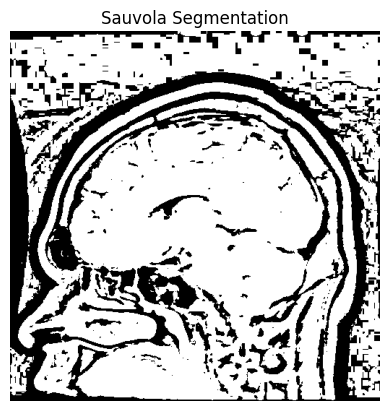

In [8]:
def apply_sauvola(image):
    window_size = 25
    thresh = threshold_sauvola(image, window_size=window_size)
    binary = image > thresh
    return binary.astype(np.uint8)

sauvola_result = apply_sauvola(images[0])

plt.imshow(sauvola_result, cmap='gray')
plt.title("Sauvola Segmentation")
plt.axis("off")
plt.show()


In [9]:
def dice_score(y_true, y_pred):
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()
    
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection) / (np.sum(y_true) + np.sum(y_pred) + 1e-6)


In [10]:
def jaccard(y_true, y_pred):
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()
    return jaccard_score(y_true, y_pred)


In [11]:
dice = dice_score(otsu_result, sauvola_result)
jacc = jaccard(otsu_result, sauvola_result)

print("Dice (Otsu vs Sauvola):", dice)
print("Jaccard (Otsu vs Sauvola):", jacc)


Dice (Otsu vs Sauvola): 0.7744677796134257
Jaccard (Otsu vs Sauvola): 0.6319440376466913


In [12]:
dice_scores = []

for i in range(20):
    img = images[i]
    otsu = apply_otsu(img)
    sauvola = apply_sauvola(img)
    
    dice_scores.append(dice_score(otsu, sauvola))

print("Average Dice (20 samples):", np.mean(dice_scores))


Average Dice (20 samples): 0.8030049819597996


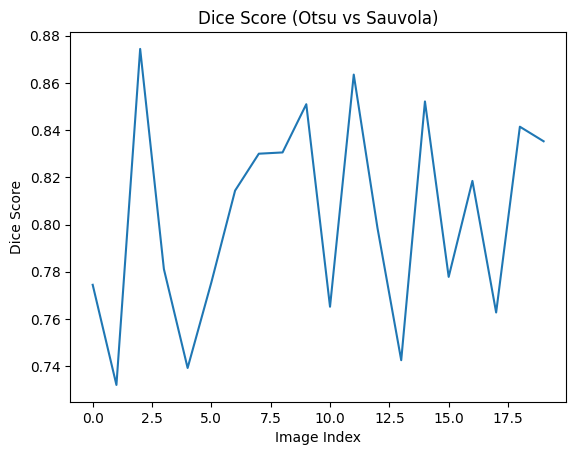

In [13]:
plt.plot(dice_scores)
plt.title("Dice Score (Otsu vs Sauvola)")
plt.xlabel("Image Index")
plt.ylabel("Dice Score")
plt.show()
